# State Choropleth Example with More Customization

### Altair documentation does not provide a lot of details on how to customize your state choropleth chart.

### Here is what their default example looks like:

In [9]:
import altair as alt
from vega_datasets import data

pop = data.population_engineers_hurricanes()
pop.head()

,state,id,population,engineers,hurricanes
0,Alabama,1,4863300,0.003422,22
1,Alaska,2,741894,0.001591,0
2,Arizona,4,6931071,0.004774,0
3,Arkansas,5,2988248,0.002440,0
4,California,6,39250017,0.007126,0


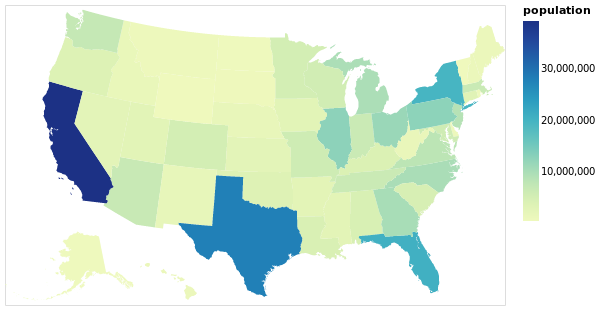

In [10]:
alt.Chart(states).mark_geoshape().encode(
    color='population:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(pop, 'id', list(pop.columns))
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

From above, we see the defaults do not look very pleasing, at least to me.

### So after a lot of reading and digging through the documentation, I finally made one with customization that I liked.

In [1]:
import altair as alt
import pandas as pd
from vega_datasets import data

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

### Sample data with a vehicle component failing at higher temperature regions in the U.S.:

In [2]:
def_rate = pd.read_csv('data/us_defect_rates.csv', sep='\t')

In [3]:
def_rate.head()

,state,id,defect_rate
0,Alabama,1,0.8750
1,Alaska,2,0.0100
2,Arizona,4,0.7654
3,Arkansas,5,0.7560
4,California,6,0.3455


### Map sample data to the json geo-coded data and create an Altair ```mark_geoshape()``` chart:

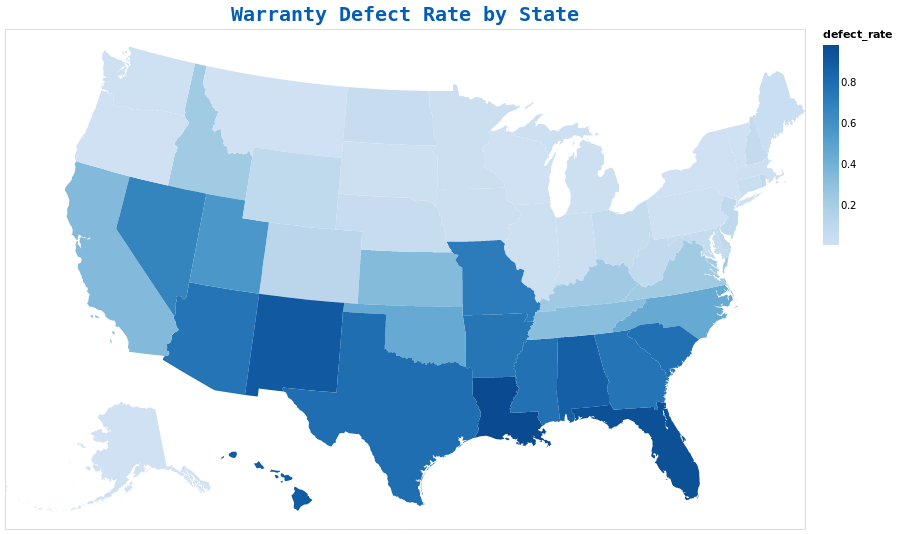

In [13]:
states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states, title="Warranty Defect Rate by State").mark_geoshape().encode(
    color=alt.Color('defect_rate:Q',scale=alt.Scale(scheme='blues')),
    tooltip=['state:N', 'defect_rate:Q']
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(def_rate, 'id', list(def_rate.columns))
).properties(
    width=800,
    height=500,
).project(
    type='albersUsa'
).configure_title(
    fontSize=20,
    font='Monospace',
    anchor='middle',
    color='#045FB4'
)